# Get data

In [211]:
import pandas as pd
import requests
import io

def main():
    sheet_url = "https://docs.google.com/spreadsheets/d/16KdPTUTJUqDMFtUkrSFRPGgfprX0rCr5GoTyYekZoE8/export?format=csv"

    response = requests.get(sheet_url)

    if response.status_code != 200:
        print("Ошибка при получении данных:", response.status_code)
        return

    data = response.content.decode('utf-8')

    df = pd.read_csv(io.StringIO(data))

    return df

df = main()
df

,Country,Name of University,Description,Worth pursuing (Y/N),Flags,Observations for approaching strategy,Website Uni,Website TTO,Contact point,Name of contact point,Unnamed: 10
0,Belgium,KU Leuven,NaN,NaN,NaN,NaN,https://lrd.kuleuven.be/en,NaN,https://www.linkedin.com/showcase/kuleuven-inn...,NaN,NaN
1,Germany,University of Erlangen Nuremberg,NaN,NaN,NaN,NaN,https://www.fau.eu/,NaN,NaN,NaN,NaN
2,United Kingdom,Imperial College London,NaN,NaN,NaN,NaN,https://www.imperial.ac.uk/,NaN,NaN,NaN,NaN
3,United Kingdom,University of Cambridg,NaN,NaN,NaN,NaN,https://map.cam.ac.uk/,https://www.enterprise.cam.ac.uk/,"University of Cambridge, Hauser Forum, 3 Charl...",Dr Iain Thomas \nHead of Life Sciences,NaN
4,Switzerland,EPFL - Swiss Federal lnstitute of Technology L...,NaN,NaN,NaN,NaN,https://www.epfl.ch/en/,https://search.epfl.ch/?filter=unit&q=I-VP,Address: QIJ 1 117.08 (EPFL Innovation Park J)...,Name: Ursula Oesterle\nPosition: Vice Presiden...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
90,Italy,University of Padova,NaN,NaN,NaN,NaN,NaN,NaN,https://www.unipd.it/en/innovation-business-re...,NaN,NaN
91,France,University of Nice Sophia Antipolis,NaN,NaN,NaN,NaN,NaN,https://univ-cotedazur.eu/,https://life.univ-cotedazur.eu/research-and-in...,NaN,NaN
92,Germany,Darmstadt University of Technology,NaN,NaN,NaN,NaN,NaN,https://www.tu-darmstadt.de/,NaN,NaN,Name: Deniz Bayramoglu\nPosition: Head of IP- ...
93,Italy,Sapienza University Rome,NaN,NaN,NaN,NaN,NaN,https://www.uniroma1.it/en/pagina-strutturale/...,https://www.uniroma1.it/en/pagina/innovation-a...,NaN,Name: Daniele Riccioni\nPosition: Head of Inno...


# Group data

In [212]:
groupby = df.groupby('Country')['Name of University'].apply(list).reset_index()

df2 = pd.DataFrame(
    {
        'Country': groupby['Country'],
        'Universities': groupby['Name of University']
    }
)

count = []

for i in df2.index:
    count.append(len(list(df2.loc[i, 'Universities'])))

df2['Number of Universities'] = count
df2

,Country,Universities,Number of Universities
0,Austria,[Vienna University of Technology],1
1,Belgium,"[KU Leuven, Free University of Brussels, Catho...",6
2,Denmark,"[Technical University of Denmark, University o...",3
3,France,"[University of Paris Sud - Paris 11, Universit...",18
4,Germany,"[University of Erlangen Nuremberg, Technical U...",23
5,Ireland,[Trinity College Dublin],1
6,Italy,"[Politecnico University of Milano, University ...",4
7,Netherlands,"[Leiden University, Delft University of Techno...",9
8,Norway,"[University of Oslo, Norwegian University of S...",2
9,Poland,[Jagiellonian University],1


# Split data

In [213]:
df3 = df.copy()

df3['Email'] = df3['Contact point'].str.extract(r'Email:\s*([^\n]+)')
df3['Phone'] = df3['Contact point'].str.extract(r'Phone:\s*([^\n]+)')
df3['Address'] = df3['Contact point'].str.extract(r'Address:\s*([^\n]+)')

for i in ['Contact point', 'Description', 'Worth pursuing (Y/N)', 'Observations for approaching strategy', 'Flags ']:
    df3.drop(i, axis = 1, inplace = True)

df3

,Country,Name of University,Website Uni,Website TTO,Name of contact point,Unnamed: 10,Email,Phone,Address
0,Belgium,KU Leuven,https://lrd.kuleuven.be/en,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,University of Erlangen Nuremberg,https://www.fau.eu/,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,Imperial College London,https://www.imperial.ac.uk/,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,University of Cambridg,https://map.cam.ac.uk/,https://www.enterprise.cam.ac.uk/,Dr Iain Thomas \nHead of Life Sciences,NaN,enquiries@enterprise.cam.ac.uk,+44 1223 760339,NaN
4,Switzerland,EPFL - Swiss Federal lnstitute of Technology L...,https://www.epfl.ch/en/,https://search.epfl.ch/?filter=unit&q=I-VP,Name: Ursula Oesterle\nPosition: Vice Presiden...,NaN,NaN,+41 21 693 86 74,QIJ 1 117.08 (EPFL Innovation Park J)
...,...,...,...,...,...,...,...,...,...
90,Italy,University of Padova,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,France,University of Nice Sophia Antipolis,NaN,https://univ-cotedazur.eu/,NaN,NaN,NaN,NaN,NaN
92,Germany,Darmstadt University of Technology,NaN,https://www.tu-darmstadt.de/,NaN,Name: Deniz Bayramoglu\nPosition: Head of IP- ...,NaN,NaN,NaN
93,Italy,Sapienza University Rome,NaN,https://www.uniroma1.it/en/pagina-strutturale/...,NaN,Name: Daniele Riccioni\nPosition: Head of Inno...,NaN,NaN,NaN


# Using matplotlib

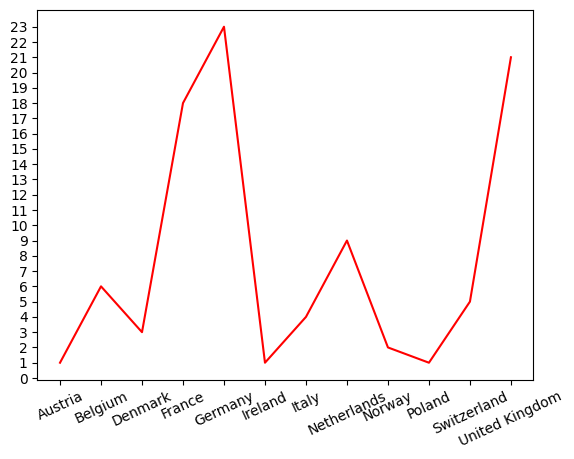

In [214]:
import matplotlib.pyplot as plt

plt.plot(df2['Country'], df2['Number of Universities'], color = 'red')
plt.xticks(rotation = 25)
plt.yticks(list(range(0, max(df2['Number of Universities']) + 1, 1)))

plt.show()

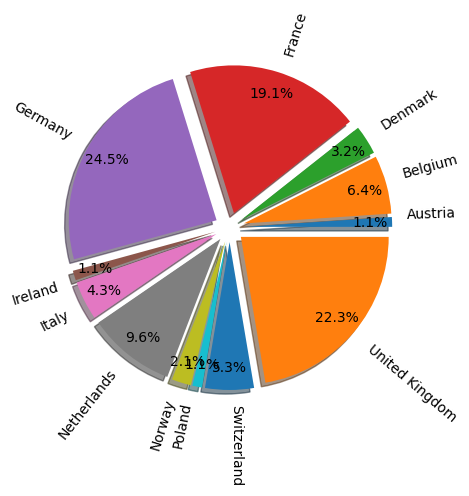

In [215]:
myexplode = [0.1 for i in range(0, len(df2['Country']))]
plt.pie(df2['Number of Universities'], labels = df2['Country'], autopct = '%1.1f%%', pctdistance = 0.85, shadow = True, explode = myexplode, rotatelabels = True)
plt.show()